<a href="https://colab.research.google.com/github/SunhoPark2107/python-restore/blob/main/0628_konlpy_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

from konlpy.tag import Mecab
tokenizer = Mecab()



Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 81 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,363 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 161633 files and d

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:

import konlpy
import pandas as pd
import numpy as np



In [10]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ratings_train.txt', delimiter = '\t', keep_default_na=False)

In [11]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ratings_test.txt', delimiter = '\t', keep_default_na=False)

In [12]:
# MECAB
from konlpy.tag import Mecab
tokenizer = Mecab()

In [13]:
string_test = "아버지가 방에 들어가신다"
tokenizer.morphs(string_test)

['아버지', '가', '방', '에', '들어가', '신다']

In [14]:
def mecab_tokenizer(text):
  return tokenizer.morphs(text)

In [15]:
# TFIDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(tokenizer=mecab_tokenizer, ngram_range=(1, 2), min_df = 3, max_df = 0.9)

In [17]:
tfidf.fit(df_train['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=3, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function mecab_tokenizer at 0x7f923fcb00e0>,
                use_idf=True, vocabulary=None)

In [18]:
df_train_tfidf = tfidf.transform(df_train['document'])

In [19]:
# 선형 서포트 벡터 분류기
from sklearn.svm import LinearSVC

svm = LinearSVC()

In [20]:
svm.fit(df_train_tfidf, df_train['label'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [21]:
svm.score(df_train_tfidf, df_train['label'])

0.9693533333333333

In [22]:
# test세트 처리하기
df_test_tfidf = tfidf.transform(df_test['document'])

In [23]:
test_pred = svm.predict(df_test_tfidf)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(df_test['label'], test_pred)

0.86794

In [26]:
s1 = input("얌 말할거잇니:")

얌 말할거잇니:아니


In [27]:
import re
s1 = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(s1)
print(s1)

['아니']


In [28]:
s1_tfidf = tfidf.transform(s1)
s1_pred = svm.predict(s1_tfidf)

In [29]:
if (s1_pred == 0): print("먼일임 기분 안좋으?")
else: print("좋은일잇냠")

먼일임 기분 안좋으?


In [30]:
# json 파일 읽어오기.
import json
with open('/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news.json') as j_f:
  data = json.load(j_f)

In [31]:
data_title = []
data_description = []
for item in data:
  data_title.append(item['title'])
  data_description.append(item['description'])

In [32]:
data_title[:10]

["결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;",
 '창녕군, ‘창녕형’비대면 선별진료소 운영',
 "DK모바일, 메인 홍보 모델로 AOA '설현' 선정",
 '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]',
 '이재갑 장관, 고용안정지원금 서울센터 방문',
 "'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다",
 "31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불",
 '국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’',
 '경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구',
 '이용빈 원내부대표 &quot;<b>코로나</b> 대응 의료진·노동자 건강권 보장해야&quot;']

In [33]:
len(data_title)

800

In [34]:
data_description[:10]

['<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ',
 '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ',
 "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ",
 '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ',
 '\xa0이재갑\xa0고용노동부\xa0장관은\xa06월3일(수)\xa011시에\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0서울\xa01센터(서울\xa0중구)를\xa0방문했다. 이번\xa0현장\xa0방문은\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0신청을\xa0시작한\xa0지\xa0이틀\xa0만에\xa0약\xa012만건... ',
 "하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로 오프라인 행사를 진행하지 않게 되었고, 공식 채널(Canal +)을 통해 ‘Cannes Official Selection 2020’ 명칭의 초청작 리스트를 공개했다. 한편 '반도'는 7월 국내외... ",
 '경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔고 지난 홍콩 국가보안법

In [35]:
data_df = pd.DataFrame({'title':data_title, 'description':data_description})

In [36]:
data_df[:10]

,title,description
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ..."
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’..."
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...
5,"'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다",하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로...
6,"31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불",경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔...
7,국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’,전국 컨테이너 처리량 243만TEU…2.5%↓ 국내 항만은 4월 들어 신종 <b>코...
8,"경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구","한편, '<b>코로나</b>19'로 인한 해외의 식재료 사재기에서 보듯이 국민들의 ..."
9,이용빈 원내부대표 &quot;<b>코로나</b> 대응 의료진·노동자 건강권 보장해야...,이용빈 의원실 제공 이용빈 민주당 원내부대표가 4일 &quot;<b>코로나</b> ...


In [37]:
data_df['title'] = data_df['title'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
data_df['description'] = data_df['description'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

In [38]:
data_df[:10]

,title,description
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...
5,부산행 반도 로 이어지는 한국형 좀비 세계관 칸의 선택 받았다,하지만 올해 신종 코로나 바이러스 감염증 코로나 여파로 오프라인 행사를 진행하지...
6,년만 첫 불허 에도 홍콩 톈안문 추모 촛불,경찰은 코로나 감염이 우려된다며 명 이상을 모이는 집회를 봉쇄해왔고 지난 홍콩...
7,국내 대 항만 월 물동량 인천항만 상승곡선,전국 컨테이너 처리량 만 국내 항만은 월 들어 신종 코로나 바이러스 감염증 ...
8,경기도의회 농정해양위 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구,한편 코로나 로 인한 해외의 식재료 사재기에서 보듯이 국민들의 먹거리를 안정적으...
9,이용빈 원내부대표 코로나 대응 의료진 노동자 건강권 보장해야,이용빈 의원실 제공 이용빈 민주당 원내부대표가 일 코로나 상시화 장기화에 따...


In [39]:
data_title_tfidf = tfidf.transform(data_df['title'])

In [40]:
data_title_pred = svm.predict(data_title_tfidf)

In [41]:
data_df['title_label'] = data_title_pred

In [42]:
data_df

,title,description,title_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,1
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,1
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0
...,...,...,...
795,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 ...,1
796,중부발전 소규모 태양광사업자 판매대금 선 지급,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적...,1
797,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식...,1
798,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사...,0


In [43]:
data_description_tfidf = tfidf.transform(data_df['description'])
data_description_pred = svm.predict(data_description_tfidf)

In [44]:
data_df['description_label'] = data_description_pred

In [45]:
data_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news.csv", encoding = 'utf-8')

In [46]:
data_df[:5]

,title,description,title_label,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,1,0
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,1,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,1,1
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


In [47]:
data_df['title_label'].value_counts()

0    478
1    322
Name: title_label, dtype: int64

In [48]:
data_df['description_label'].value_counts()

0    449
1    351
Name: description_label, dtype: int64

In [49]:
columns_name = ['title', 'title_label', 'description', 'description_label']

In [50]:
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns = columns_name)

In [51]:
POS_data_df

,title,title_label,description,description_label


In [52]:
for i, data in data_df.iterrows():
  title = data['title']
  description = data['description']
  title_label = data["title_label"]
  description_label = data["description_label"]
  data = [[title, title_label, description, description_label]]
  if description_label == 0:
    NEG_data_df = NEG_data_df.append(pd.DataFrame(data, columns = columns_name), ignore_index = True)
  else :
    POS_data_df = POS_data_df.append(pd.DataFrame(data, columns = columns_name), ignore_index = True)


NEG_data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news_NEG.csv', encoding = "euc-kr")
POS_data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news_POS.csv', encoding = "euc-kr")

In [53]:
NEG_data_df[:3]

,title,title_label,description,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,0,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0
1,창녕군 창녕형 비대면 선별진료소 운영,1,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0
2,이재갑 장관 고용안정지원금 서울센터 방문,0,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0


In [54]:
POS_data_df[:3]

,title,title_label,description,description_label
0,모바일 메인 홍보 모델로 설현 선정,1,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,1
1,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,1,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,1
2,부산행 반도 로 이어지는 한국형 좀비 세계관 칸의 선택 받았다,1,하지만 올해 신종 코로나 바이러스 감염증 코로나 여파로 오프라인 행사를 진행하지...,1


In [55]:
POS_description = POS_data_df['description']
NEG_description = NEG_data_df['description']

In [83]:
POS_description_noun_tk = []
for d in POS_description:
  POS_description_noun_tk.append(tokenizer.nouns(d))   # 여기에서 tokenizer은 mecab이다.위에 올라가 보면 있음.
# POS_description_noun_tk
POS_description_noun_join = []
for d in POS_description_noun_tk :
  d2 = [w for w in d if len(w) > 1]
  POS_description_noun_join.append(" ".join(d2))
# POS_description_noun_join[:5]

['한편 설현 최근 코로나 바이러스 시리즈 세계 유행 다큐멘터리 내레이션 처음 도전 호평 드라마 출연 검토 게임 이벤트',
 '변화 핵심 우리 사회 신종 코로나 바이러스 감염증 코로나 위기 미래 모른다 국가 국민 어려움 해결 저희',
 '올해 신종 코로나 바이러스 감염증 코로나 여파 오프라인 행사 진행 공식 채널 명칭 청작 리스트 공개 한편 국내외',
 '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 주요 과제 부각 농민 기본소득 도입 안정 생산 기반 확충',
 '코로나 사태 지속 의대 강의 대부분 대면 실습 강의실 풍경 예전 코로나 대부분 학과 수업']

In [57]:
NEG_description_noun_tk = []
for d in NEG_description:
  NEG_description_noun_tk.append(tokenizer.nouns(d))   # 여기에서 tokenizer은 mecab이다.위에 올라가 보면 있음.
# NEG_description_noun_tk
NEG_description_noun_join = []
for d in NEG_description_noun_tk :
  d2 = [w for w in d if len(w) > 1]
  NEG_description_noun_join.append(" ".join(d2))
# NEG_description_noun_join[:5]

In [58]:
# p.408~
# 단어들의 가중치 확인.

POS_tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer, min_df = 2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)
POS_vocab = dict()

In [59]:
for idx, word in enumerate(POS_tfidf.get_feature_names()):
  POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key = lambda x:x[1], reverse = True)


In [60]:
NEG_tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer, min_df = 2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)
NEG_vocab = dict()

In [61]:
for idx, word in enumerate(NEG_tfidf.get_feature_names()):
  NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key = lambda x:x[1], reverse = True)

In [62]:
POS_words[:5]

[('코로나', 26.93947807550704),
 ('서울', 9.607085771237385),
 ('바이러스', 9.255651895667263),
 ('신종', 8.739115663247095),
 ('감염증', 8.290149332161258)]

In [63]:
NEG_words[:5]

[('코로나', 35.31284742886535),
 ('바이러스', 15.938122092110822),
 ('신종', 14.55057899679154),
 ('감염증', 14.401469506150285),
 ('확산', 10.15370638444467)]

In [64]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic') 
# 그래프에서 - 가 깨지는 문제 "그룹-1"
matplotlib.rcParams['axes.unicode_minus'] = False

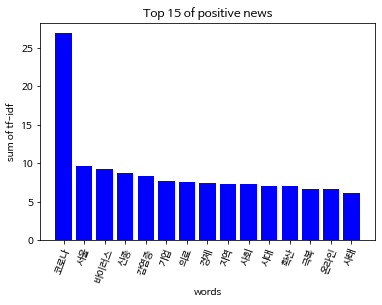

In [65]:
max = 15
plt.bar(range(max), [i[1] for i in POS_words[:max]], color = "blue")
plt.title("Top 15 of positive news")
plt.xlabel("words")
plt.ylabel("sum of tf-idf")
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation = 70)
plt.show()

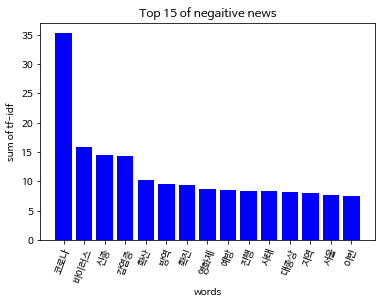

In [66]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color = "blue")
plt.title("Top 15 of negaitive news")
plt.xlabel("words")
plt.ylabel("sum of tf-idf")
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation = 70)
plt.show()

In [67]:
description = data_df['description']
description.shape

(800,)

In [68]:
description_noun_tk = []
for d in description:
  nouns = tokenizer.nouns(d)
  description_noun_tk.append(nouns)
description_noun_tk[:1]

[['코로나',
  '발',
  '경제',
  '위기',
  '대응',
  '돈',
  '곳',
  '국세',
  '수입',
  '정부',
  '재정',
  '마련',
  '우려',
  '때문',
  '한국개발원',
  '등',
  '국책',
  '연구',
  '기관',
  '증세',
  '화두',
  '정부',
  '여당',
  '증세']]

In [69]:
description_noun_tk2 = []

for d in description_noun_tk:
  item = [i for i in d if len(i) > 1]
  description_noun_tk2.append(item)
description_noun_tk2[:1]

[['코로나',
  '경제',
  '위기',
  '대응',
  '국세',
  '수입',
  '정부',
  '재정',
  '마련',
  '우려',
  '때문',
  '한국개발원',
  '국책',
  '연구',
  '기관',
  '증세',
  '화두',
  '정부',
  '여당',
  '증세']]

In [70]:
import gensim
import gensim.corpora as corpora

In [71]:
dictionary = corpora.Dictionary(description_noun_tk2)
print(dictionary[0])
print(dictionary[1])

경제
국세


In [72]:
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(15, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 3),
  (31, 1),
  (32, 1),
  (33, 1)],
 [(15, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1)],
 [(11, 1),
  (15, 2),
  (40, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(15, 2),
  (64, 3),
  (65, 2),
  (66, 1),
  (67, 2),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1)],
 [(15, 2),
  (40, 1),
  (49, 1),
  (51, 1),
  (5

In [73]:
k = 4
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics= k, id2word=dictionary, passes = 1, workers = 10)

In [74]:
print(lda_model.print_topics(num_topics=k, num_words=max))

[(0, '0.057*"코로나" + 0.010*"신종" + 0.010*"바이러스" + 0.010*"감염증" + 0.008*"이번" + 0.007*"확산" + 0.006*"확진" + 0.005*"온라인" + 0.005*"영화제" + 0.005*"진행" + 0.004*"사태" + 0.004*"방역" + 0.004*"교육" + 0.004*"지역" + 0.004*"극복"'), (1, '0.047*"코로나" + 0.011*"바이러스" + 0.010*"신종" + 0.007*"감염증" + 0.006*"시대" + 0.005*"서울" + 0.005*"기업" + 0.005*"정부" + 0.005*"방역" + 0.005*"여파" + 0.004*"포스트" + 0.004*"확산" + 0.004*"확진" + 0.004*"경제" + 0.004*"시장"'), (2, '0.048*"코로나" + 0.008*"바이러스" + 0.007*"지역" + 0.007*"신종" + 0.006*"감염증" + 0.006*"확진" + 0.006*"확산" + 0.005*"진행" + 0.005*"지원" + 0.004*"경제" + 0.004*"생활" + 0.004*"예방" + 0.004*"방역" + 0.004*"서울" + 0.004*"대종상"'), (3, '0.080*"코로나" + 0.012*"바이러스" + 0.011*"감염증" + 0.011*"신종" + 0.007*"서울" + 0.006*"확산" + 0.005*"사태" + 0.005*"지역" + 0.005*"의료" + 0.005*"경제" + 0.005*"시장" + 0.005*"어려움" + 0.004*"사회" + 0.004*"시대" + 0.004*"이번"')]


In [97]:
from wordcloud import WordCloud

In [98]:
import matplotlib.pyplot as plt
dict1 ={"딸기": 10 , "사과" : 20, "바나나": 15, "키위" :5, "멜론": 12}
path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(background_color='ivory', width=800, height=600)
plt.rc('font', family='NanumBarunGothic') 

In [99]:
wc = WordCloud(font_path = path, background_color='ivory', width= 800, height = 600)

In [100]:
cloud = wc.generate_from_frequencies(dict1)

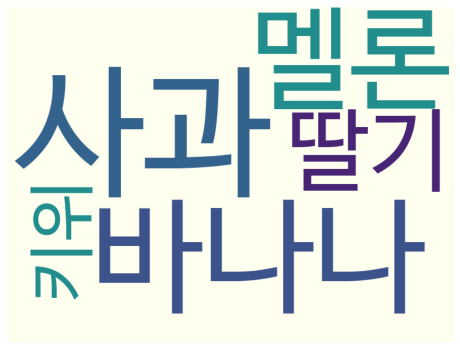

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

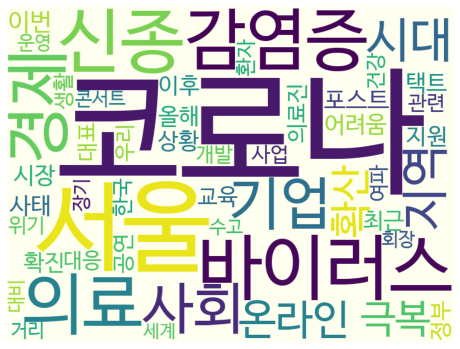

In [108]:
path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
wc = WordCloud(font_path = path, background_color='ivory', width=800, height=600, max_words = 50)

corpus = POS_description_noun_join
vectorizer = TfidfVectorizer()
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1)
Cloud = wc.generate_from_frequencies(df.T.sum(axis=1))

plt.figure(figsize = (8, 8))
plt.imshow(Cloud)
plt.axis('off')
plt.show()

In [80]:
POS_words[:5]

[('코로나', 26.93947807550704),
 ('서울', 9.607085771237385),
 ('바이러스', 9.255651895667263),
 ('신종', 8.739115663247095),
 ('감염증', 8.290149332161258)]

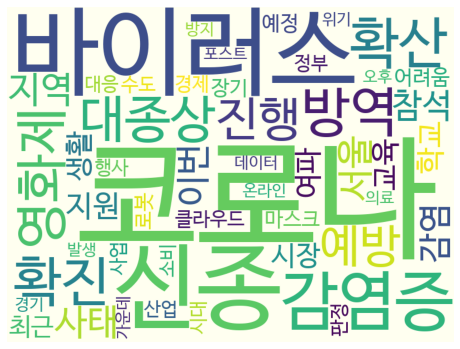

In [109]:
path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
wc = WordCloud(font_path = path, background_color='ivory', width=800, height=600, max_words = 50)

corpus = NEG_description_noun_join
vectorizer = TfidfVectorizer()
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1)
Cloud = wc.generate_from_frequencies(df.T.sum(axis=1))

plt.figure(figsize = (8, 8))
plt.imshow(Cloud)
plt.axis('off')
plt.show()

In [81]:
NEG_words[:5]

[('코로나', 35.31284742886535),
 ('바이러스', 15.938122092110822),
 ('신종', 14.55057899679154),
 ('감염증', 14.401469506150285),
 ('확산', 10.15370638444467)]